In [1]:
import pandas as pd

In [2]:
import pandas as pd
from sklearn import model_selection

In [3]:
data = pd.read_csv('parkinsons.csv', delimiter=',')

In [4]:
X = data.drop(columns=['name', 'status'])
y = data['status']
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

In [6]:
feature_names = X.columns
print(feature_names)

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')


In [7]:
import numpy as np
clf = LassoCV().fit(X, y)
importance = np.abs(clf.coef_)
print(importance)

[ 0.00155609  0.00044755  0.00126233  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.14081363  0.
  0.17088693  0.        ]


In [8]:
idx_third = importance.argsort()[-3]
threshold = importance[idx_third] + 0.001

idx_features = (-importance).argsort()[:2]
name_features = np.array(feature_names)[idx_features]
print('Selected features: {}'.format(name_features))

sfm = SelectFromModel(clf, threshold=threshold)
sfm.fit(X, y)
X_transform = sfm.transform(X)

n_features = sfm.transform(X).shape[1]

Selected features: ['D2' 'spread1']


In [9]:
# X_transform = X[['D2','spread1','MDVP:Fo(Hz)']]
X_transform.shape

(195, 2)

In [10]:
# 75% training set and 25% testing set
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)

In [11]:
x_train.shape

(146, 22)

In [12]:
from sklearn.metrics import confusion_matrix
y_true = y_test

In [13]:
from sklearn import svm
classifier = svm.SVC().fit(x_train, y_train)
print(classifier.score(x_test, y_test))
y_pred = classifier.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity is : " , specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy is : " , accuracy)
sensitivity = tp / (tp + fn)
print("Sensitivity is : " , sensitivity)

0.857142857143
Specificity is :  0.363636363636
Accuracy is :  0.857142857143
Sensitivity is :  1.0


In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5).fit(x_train, y_train)
print(knn.score(x_test, y_test))
y_pred = knn.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity is : " , specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy is : " , accuracy)
sensitivity = tp / (tp + fn)
print("Sensitivity is : " , sensitivity)

0.938775510204
Specificity is :  0.818181818182
Accuracy is :  0.938775510204
Sensitivity is :  0.973684210526


In [15]:
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(x_train, y_train)
print(clf.score(x_test, y_test))
y_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity is : " , specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy is : " , accuracy)
sensitivity = tp / (tp + fn)
print("Sensitivity is : " , sensitivity)

0.897959183673
Specificity is :  0.818181818182
Accuracy is :  0.897959183673
Sensitivity is :  0.921052631579


In [16]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, max_iter=1000).fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity is : " , specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy is : " , accuracy)
sensitivity = tp / (tp + fn)
print("Sensitivity is : " , sensitivity)

Specificity is :  0.727272727273
Accuracy is :  0.918367346939
Sensitivity is :  0.973684210526


In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=2000).fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
specificity = tn / (tn+fp)
print("Specificity is : " , specificity)
accuracy = (tp + tn) / (tp + tn + fp + fn)
print("Accuracy is : " , accuracy)
sensitivity = tp / (tp + fn)
print("Sensitivity is : " , sensitivity)

Specificity is :  0.727272727273
Accuracy is :  0.857142857143
Sensitivity is :  0.894736842105


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

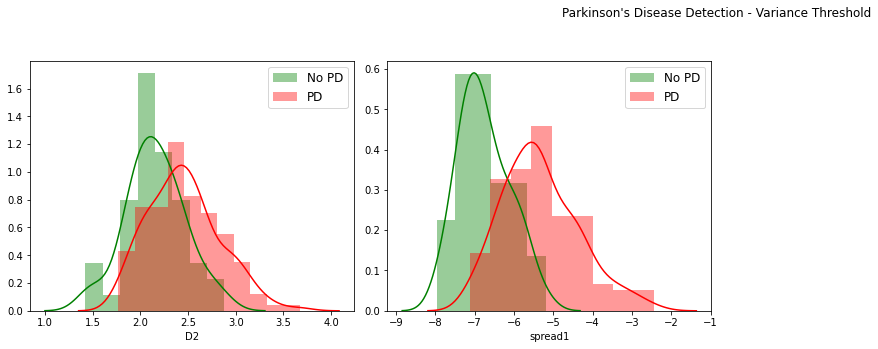

In [19]:
fig = plt.figure(figsize = (20, 25))
j = 0
features = ['D2', 'spread1']
for i in features:
    plt.subplot(6,4, j+1)
    j += 1
    sns.distplot(data[i][data['status']==0], color='g', label = 'No PD')
    sns.distplot(data[i][data['status']==1], color='r', label = 'PD')
    plt.legend(loc='best', fontsize=12)
fig.suptitle("Parkinson's Disease Detection - Variance Threshold", fontsize=12)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

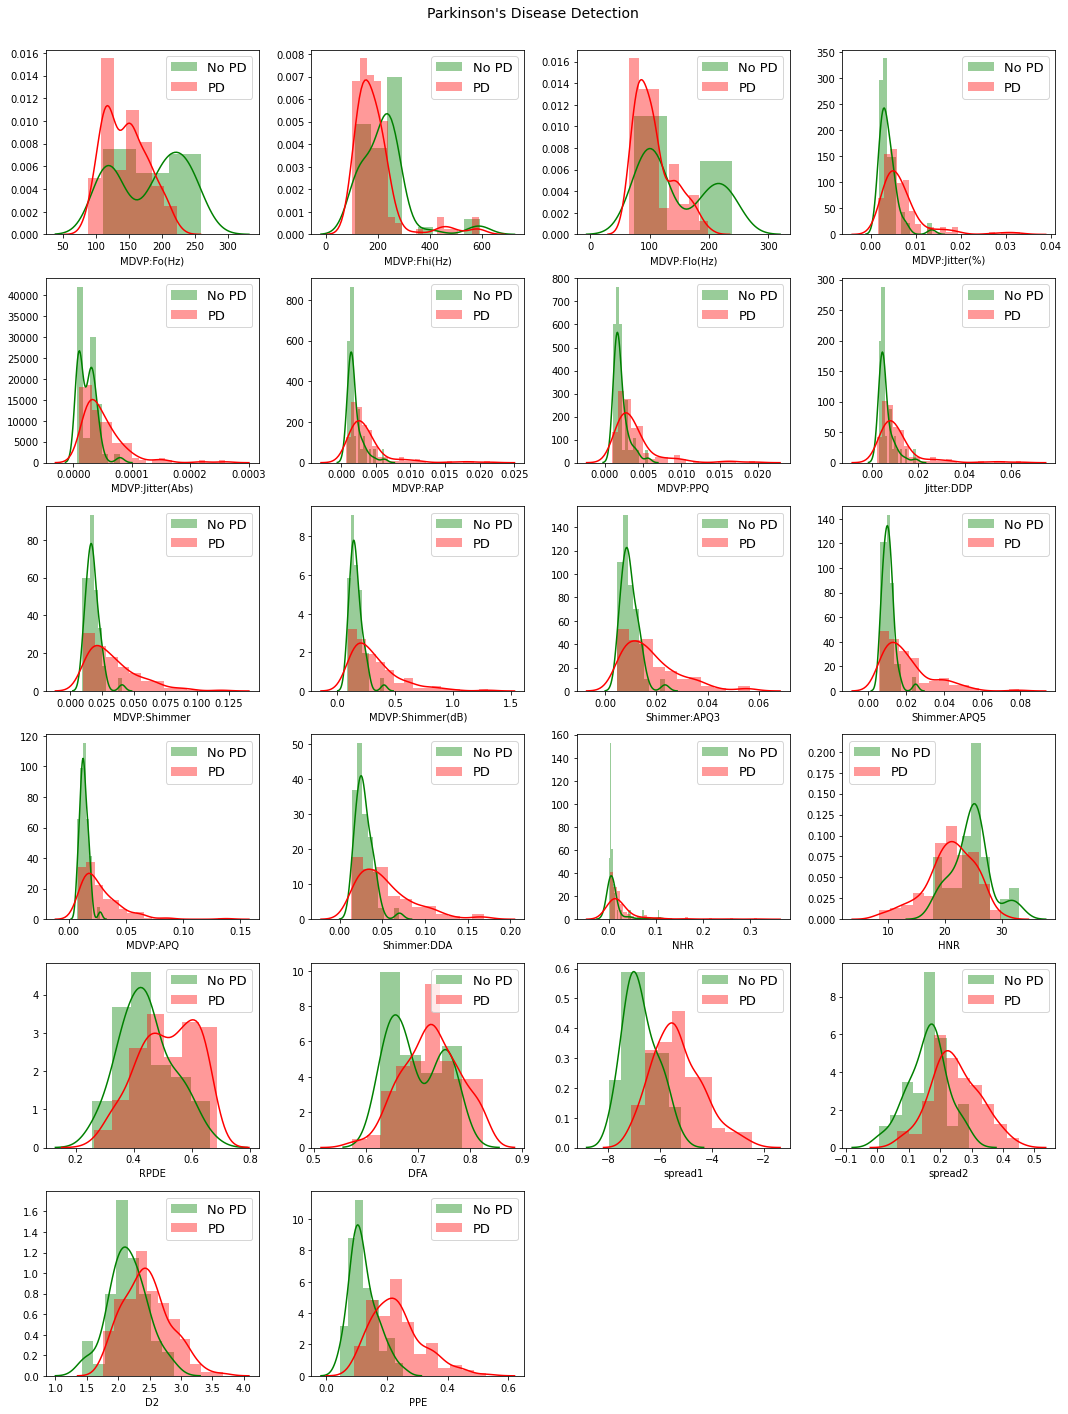

In [40]:
fig = plt.figure(figsize = (15,20))
j = 0
data = pd.read_csv('parkinsons.csv', delimiter=',')
features = data.columns.drop(['name','status'])
for i in features:
    plt.subplot(6,4, j+1)
    j += 1
    sns.distplot(data[i][data['status']==0], color='g', label = 'No PD')
    sns.distplot(data[i][data['status']==1], color='r', label = 'PD')
    plt.legend(loc='best', fontsize=13)
fig.suptitle("Parkinson's Disease Detection", fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()